In [ ]:
%tensorflow_version 1.x
!pip3 install --quiet ml4a

# Load semantic segmentation

Currently `semantic_segmentation` has one pre-trained model with the following classes.

In [ ]:
from ml4a import image
from ml4a.models import semantic_segmentation

print(semantic_segmentation.classes)

{0: 'wall', 1: 'building', 2: 'sky', 3: 'floor', 4: 'tree', 5: 'ceiling', 6: 'road', 7: 'bed', 8: 'windowpane', 9: 'grass', 10: 'cabinet', 11: 'sidewalk', 12: 'person', 13: 'earth', 14: 'door', 15: 'table', 16: 'mountain', 17: 'plant', 18: 'curtain', 19: 'chair', 20: 'car', 21: 'water', 22: 'painting', 23: 'sofa', 24: 'shelf', 25: 'house', 26: 'sea', 27: 'mirror', 28: 'rug', 29: 'field', 30: 'armchair', 31: 'seat', 32: 'fence', 33: 'desk', 34: 'rock', 35: 'wardrobe', 36: 'lamp', 37: 'bathtub', 38: 'railing', 39: 'cushion', 40: 'base', 41: 'box', 42: 'column', 43: 'signboard', 44: 'chest', 45: 'counter', 46: 'sand', 47: 'sink', 48: 'skyscraper', 49: 'fireplace', 50: 'refrigerator', 51: 'grandstand', 52: 'path', 53: 'stairs', 54: 'runway', 55: 'case', 56: 'pool', 57: 'pillow', 58: 'screen', 59: 'stairway', 60: 'river', 61: 'bridge', 62: 'bookcase', 63: 'blind', 64: 'coffee', 65: 'toilet', 66: 'flower', 67: 'book', 68: 'hill', 69: 'bench', 70: 'countertop', 71: 'stove', 72: 'palm', 73: 'k

Load an image, then run the semantic segmentation module on it. The result is a labelmap in which every pixel is the index of the class to which the object containing that pixel belongs to.

Loading weights for net_encoder
Loading weights for net_decoder


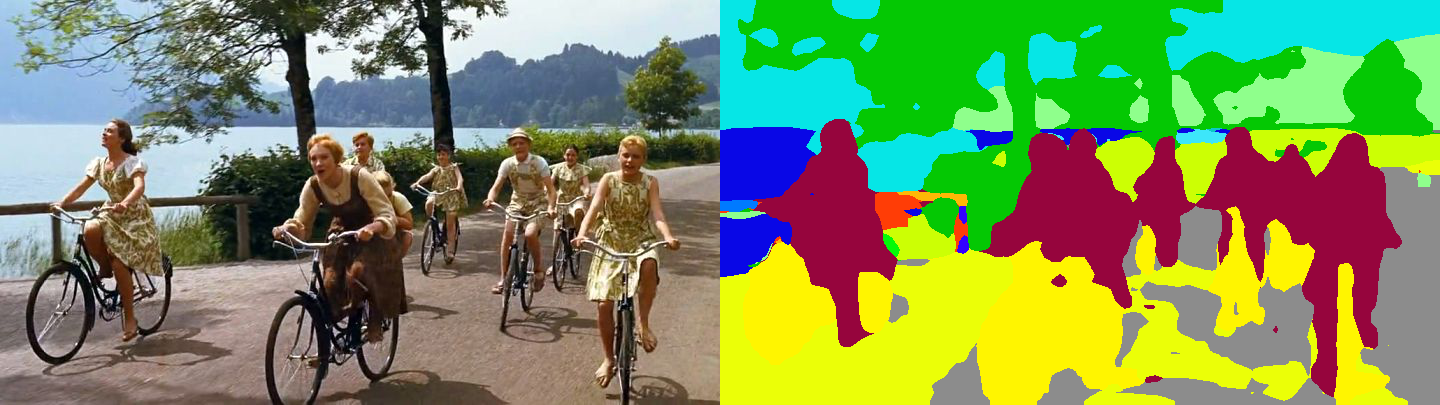

In [ ]:
img = image.load_image('https://www.cornel1801.com/videosong/Sound_of_Music_Do_Re_Mi/3.jpg')
labels = semantic_segmentation.run(img)
semantic_segmentation.visualize(img, labels)

For visualization, a nice thing to do is to superimpose the label map on top of the image.

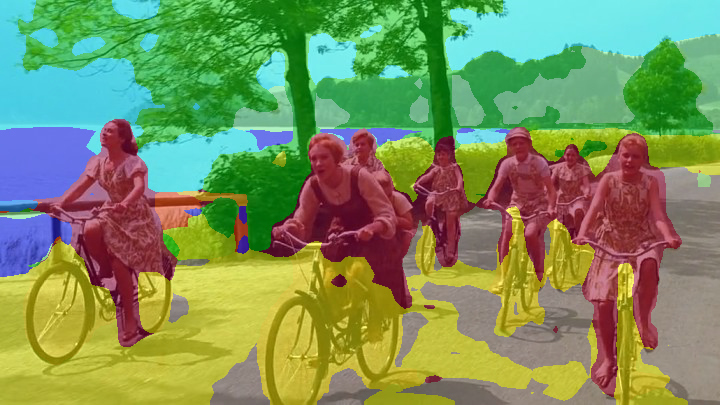

In [ ]:
import numpy as np

color_labels = semantic_segmentation.get_color_labels(labels)
image.display(0.5 * np.array(img) + 0.5 * color_labels)

You can extract and draw the segments individually. Here they are drawn for top 3 classes found by amount of pixels.

Let's try another one.

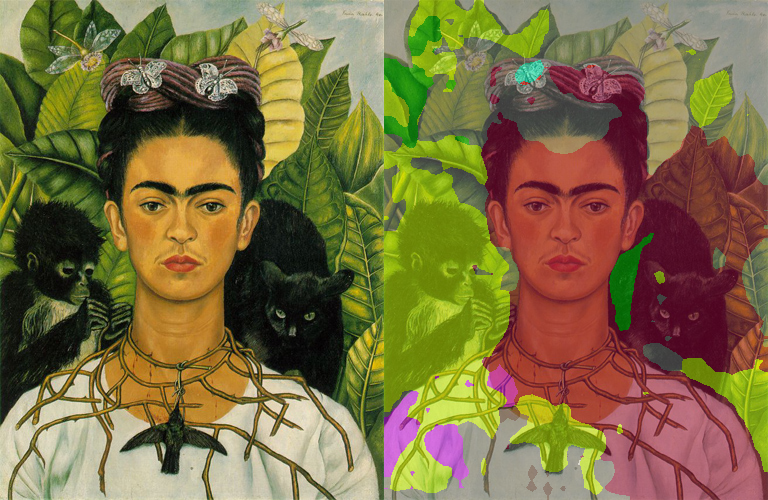

In [ ]:
img = image.fridakahlo()
labels = semantic_segmentation.run(img)
color_labels = semantic_segmentation.get_color_labels(labels)
image.display([img, 0.5 * np.array(img) + 0.5 * color_labels])

1: person


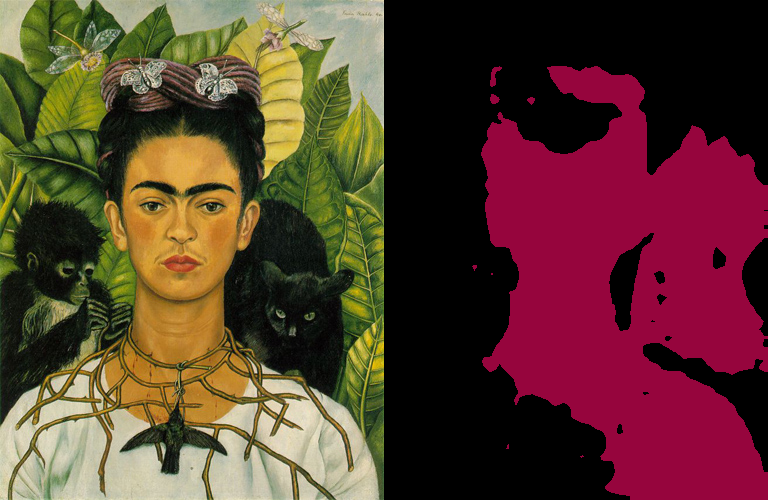

2: wall


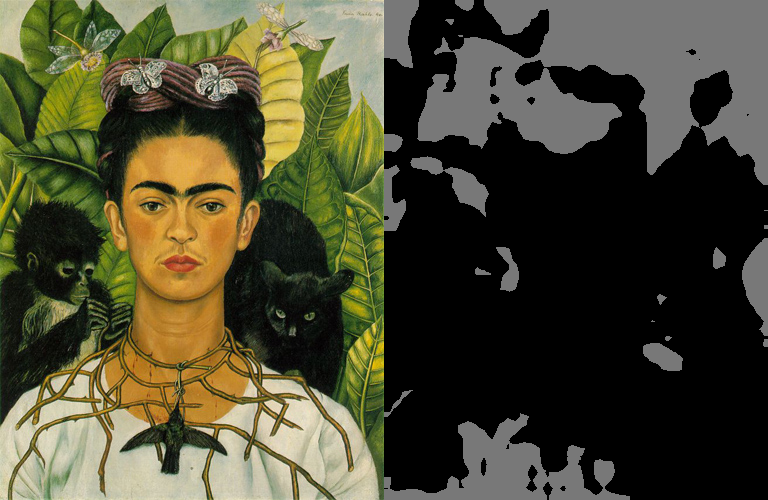

3: plant


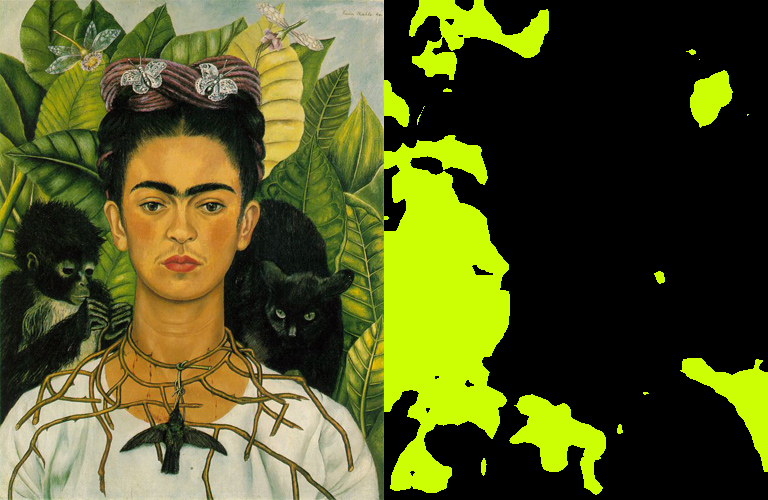

In [ ]:
import numpy as np

top_classes = np.bincount(labels.flatten()).argsort()[::-1]
for c, top_class in enumerate(top_classes[:3]):
    class_name = semantic_segmentation.classes[top_class]
    print('%d: %s' % (c+1, class_name))
    semantic_segmentation.visualize(img, labels, top_class)

You may want to cut out a particular object from the image. You can do this by masking the full image with one of its segments, corresponding to the class you want to isolate, for example the "person" class.

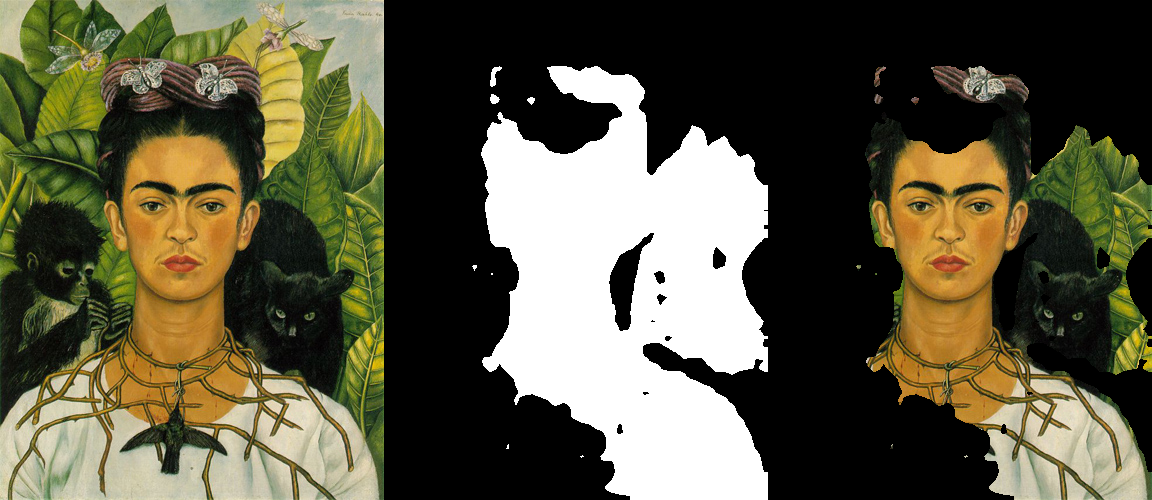

In [ ]:
from ml4a.canvas import mask

person_mask = semantic_segmentation.get_mask(labels, index='person')
img_masked = mask.mask_image(person_mask, img)

all_images = image.concatenate_images([img, person_mask, img_masked])
image.display(all_images)

Passing a list of classes will give you a mask with a channel for each one.

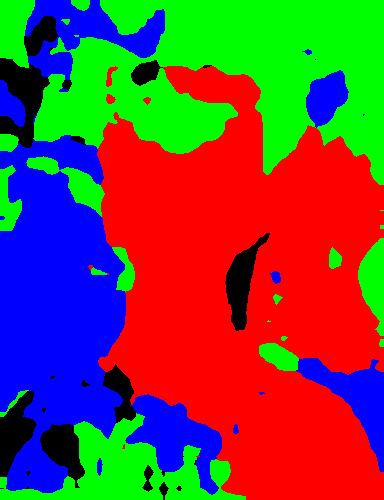

In [ ]:
multi_mask = semantic_segmentation.get_mask(labels, index=['person', 'wall', 'plant'])
image.display(multi_mask)